In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Ads_CTR_Optimisation.csv')
df.head(20)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0
7,1,1,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0


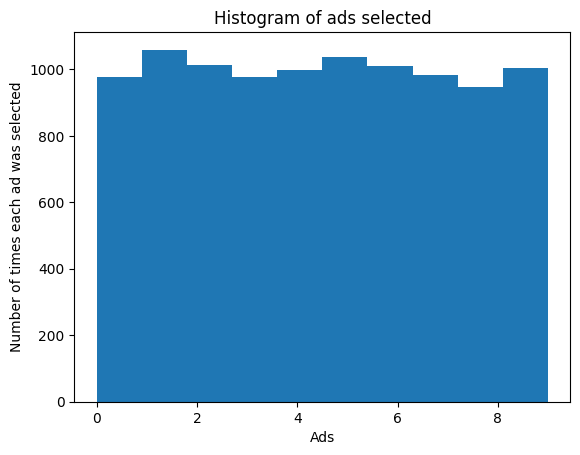

In [6]:
#randomly selecting the ads
import random
N = 10000
d = 10
ads_selected = []
total_reward = 0
for n in range(0,N):
    ad = random.randrange(d)
    ads_selected.append(ad)
    reward = df.values[n,ad]
    total_reward += reward

plt.hist(ads_selected)
plt.title('Histogram of ads selected')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()


In [11]:
#implementing the ucb algorithm
import math
N = 10000
d = 10
ad_selected = []
number_of_selections = [0] * d
sums_of_reward = [0] * d
total_reward = 0
for n in range(0,N):
    ad = 0
    max_upper_bound = 0 
    for i in range(0,d):
        if number_of_selections[i] > 0:
            average_reward = sums_of_reward[i] / number_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n+1) / number_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if(upper_bound>max_upper_bound):
            max_upper_bound = upper_bound
            ad = i 
    ad_selected.append(ad)
    number_of_selections[ad]+=1
    reward = df.values[n,ad]
    sums_of_reward[ad] += reward
    total_reward += reward
print('total reward ',total_reward)
print('best ad to select ',ad_selected[9999]+1)

total reward  2178
best ad to select  5


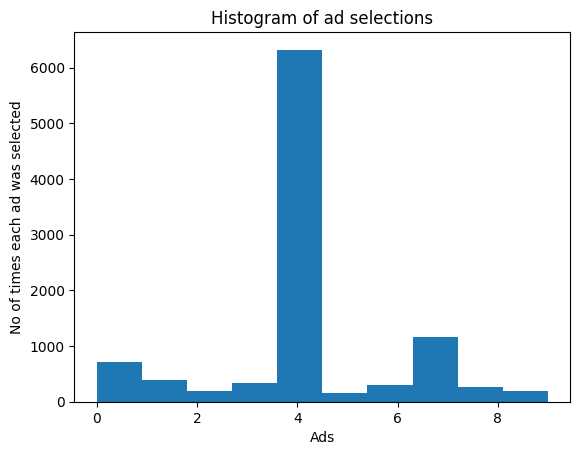

In [12]:
plt.hist(ad_selected)
plt.title('Histogram of ad selections')
plt.xlabel('Ads')
plt.ylabel('No of times each ad was selected')
plt.show()